# Capture and slit face on the picture

In [2]:
import os
import cv2
import time
from datetime import datetime
import face_recognition
import numpy as np

class FaceRecognitionSystem:
    def __init__(self, dataset_path="dataset", detection_method="hog"):
        self.dataset_path = dataset_path
        self.detection_method = detection_method

    def draw_rectangles(self, face_img, top, right, bottom, left):
        """Vẽ khung hình chữ nhật quanh khuôn mặt trên vùng đã cắt."""
        padding = 0 # Số pixel mở rộng mỗi cạnh
        # Điều chỉnh tọa độ tương đối cho vùng đã cắt
        top_padded = padding
        right_padded = face_img.shape[1] - padding
        bottom_padded = face_img.shape[0] - padding
        left_padded = padding
        # Vẽ hình chữ nhật
        cv2.rectangle(face_img, (left_padded, top_padded), (right_padded, bottom_padded), (0, 255, 0), 2)
        # Ghi nhãn "Face"
        cv2.putText(face_img, "Face", (left_padded, top_padded - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        return face_img

    def capture_images(self, num_images=10, person_name=None):
        """Chụp và lưu chỉ vùng khuôn mặt với khung hình chữ nhật."""
        # Tạo tên thư mục dựa trên person_name hoặc timestamp
        if person_name:
            output_dir = os.path.join(self.dataset_path, person_name)
        else:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            output_dir = os.path.join(self.dataset_path, f"person_{timestamp}")

        # Tạo thư mục nếu chưa tồn tại
        os.makedirs(output_dir, exist_ok=True)
        print(f"📁 Lưu ảnh khuôn mặt vào thư mục: {output_dir}")

        # Khởi tạo webcam
        video = cv2.VideoCapture(0)
        if not video.isOpened():
            print("❌ Không thể mở webcam")
            return

        print(f"🚀 Bắt đầu chụp {num_images} ảnh khuôn mặt...")
        count = 0
        while count < num_images:
            ret, frame = video.read()
            if not ret:
                print("❌ Không thể lấy khung hình từ webcam")
                break

            # Chuyển khung hình sang RGB
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Phát hiện khuôn mặt
            face_locations = face_recognition.face_locations(rgb_frame, model=self.detection_method)

            # Nếu phát hiện ít nhất một khuôn mặt
            if face_locations:
                # Chỉ xử lý khuôn mặt đầu tiên (nếu có nhiều khuôn mặt)
                top, right, bottom, left = face_locations[0]
                
                # Mở rộng vùng khuôn mặt với padding
                padding = 0
                top = max(0, top - padding)
                left = max(0, left - padding)
                right = min(frame.shape[1], right + padding)
                bottom = min(frame.shape[0], bottom + padding)

                # Cắt vùng khuôn mặt từ khung hình
                face_img = frame[top:bottom, left:right]

                # Vẽ khung hình chữ nhật trên vùng khuôn mặt
                face_img_with_boxes = self.draw_rectangles(face_img.copy(), top, right, bottom, left)

                # Lưu ảnh khuôn mặt với khung
                filename = f"face_{count:05d}.png"
                filepath = os.path.join(output_dir, filename)
                cv2.imwrite(filepath, face_img)
                print(f"📸 Đã lưu khuôn mặt thứ {count + 1}/{num_images}: {filepath}")
                count += 1

                # Hiển thị khung hình đầy đủ với khung để người dùng theo dõi
                frame_with_boxes = frame.copy()
                for (t, r, b, l) in face_locations:
                    t = max(0, t - padding)
                    l = max(0, l - padding)
                    r = min(frame.shape[1], r + padding)
                    b = min(frame.shape[0], b + padding)
                    cv2.rectangle(frame_with_boxes, (l, t), (r, b), (0, 255, 0), 2)
                    cv2.putText(frame_with_boxes, "Face", (l, t - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                cv2.imshow("Face Detection", frame_with_boxes)
            else:
                print(f"⚠️ Không phát hiện khuôn mặt trong khung hình thứ {count + 1}")
                cv2.imshow("Face Detection", frame)

            # Nhấn 'q' để thoát sớm
            if cv2.waitKey(1) & 0xFF == ord("q"):
                print("🛑 Người dùng đã thoát")
                break

            # Đợi 1 giây giữa các ảnh
            time.sleep(1)

        # Giải phóng webcam và đóng cửa sổ
        video.release()
        cv2.destroyAllWindows()
        print(f"✅ Hoàn tất! Đã lưu {count} ảnh khuôn mặt vào {output_dir}")

# Sử dụng
if __name__ == "__main__":
    # Khởi tạo hệ thống với thư mục lưu trữ dataset
    frs = FaceRecognitionSystem(dataset_path="extracted_faces")
    
    # Chụp 10 ảnh khuôn mặt, lưu với tên người (hoặc dùng timestamp nếu không cung cấp tên)
    person_name = input("Nhập tên người (hoặc để trống để dùng timestamp): ").strip()
    frs.capture_images(num_images=20, person_name=person_name if person_name else None)

📁 Lưu ảnh khuôn mặt vào thư mục: extracted_faces\2
🚀 Bắt đầu chụp 20 ảnh khuôn mặt...
📸 Đã lưu khuôn mặt thứ 1/20: extracted_faces\2\face_00000.png
📸 Đã lưu khuôn mặt thứ 2/20: extracted_faces\2\face_00001.png
📸 Đã lưu khuôn mặt thứ 3/20: extracted_faces\2\face_00002.png
📸 Đã lưu khuôn mặt thứ 4/20: extracted_faces\2\face_00003.png
📸 Đã lưu khuôn mặt thứ 5/20: extracted_faces\2\face_00004.png
📸 Đã lưu khuôn mặt thứ 6/20: extracted_faces\2\face_00005.png
📸 Đã lưu khuôn mặt thứ 7/20: extracted_faces\2\face_00006.png
⚠️ Không phát hiện khuôn mặt trong khung hình thứ 8
📸 Đã lưu khuôn mặt thứ 8/20: extracted_faces\2\face_00007.png
📸 Đã lưu khuôn mặt thứ 9/20: extracted_faces\2\face_00008.png
📸 Đã lưu khuôn mặt thứ 10/20: extracted_faces\2\face_00009.png
📸 Đã lưu khuôn mặt thứ 11/20: extracted_faces\2\face_00010.png
⚠️ Không phát hiện khuôn mặt trong khung hình thứ 12
📸 Đã lưu khuôn mặt thứ 12/20: extracted_faces\2\face_00011.png
📸 Đã lưu khuôn mặt thứ 13/20: extracted_faces\2\face_00012.png

# Change the old data to new format data

In [32]:
import os
import cv2
import face_recognition

class FaceExtractor:
    def __init__(self, dataset_path=r"C:\Users\Divu\Desktop\DADN\detect_face\dataset", output_dir="extracted_faces"):
        self.dataset_path = dataset_path
        self.output_dir = output_dir
        self.detection_method = "hog"  # Có thể đổi thành "cnn" nếu dùng GPU

    def draw_rectangles(self, face_img):
        """Vẽ khung hình chữ nhật quanh khuôn mặt trên vùng đã cắt."""
        padding = 0  # Số pixel mở rộng mỗi cạnh
        top_padded = padding
        right_padded = face_img.shape[1] - padding
        bottom_padded = face_img.shape[0] - padding
        left_padded = padding
        cv2.rectangle(face_img, (left_padded, top_padded), (right_padded, bottom_padded), (0, 255, 0), 2)
        cv2.putText(face_img, "Face", (left_padded, top_padded - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        return face_img

    def extract_faces(self):
        """Cắt khuôn mặt từ ảnh trong dataset và lưu theo cấu trúc, giữ cấu trúc thư mục."""
        print(f"🚀 Bắt đầu trích xuất khuôn mặt từ dataset: {self.dataset_path}")
        
        # Tạo thư mục đầu ra nếu chưa tồn tại
        os.makedirs(self.output_dir, exist_ok=True)

        # Lấy danh sách các thư mục con (mỗi thư mục là một người/nhãn)
        subdirs = [d for d in os.listdir(self.dataset_path) 
                  if os.path.isdir(os.path.join(self.dataset_path, d))]
        
        if not subdirs:
            print("❌ Không tìm thấy thư mục con nào trong dataset")
            return

        total_face_count = 0
        image_extensions = (".jpg", ".jpeg", ".png")

        for subdir in subdirs:
            input_subdir = os.path.join(self.dataset_path, subdir)
            output_subdir = os.path.join(self.output_dir, subdir)
            os.makedirs(output_subdir, exist_ok=True)
            
            print(f"📂 Xử lý thư mục: {subdir}")
            
            # Lấy danh sách ảnh trong thư mục con
            image_paths = [os.path.join(input_subdir, f) for f in os.listdir(input_subdir) 
                          if f.lower().endswith(image_extensions)]
            
            face_count = 0
            for idx, image_path in enumerate(image_paths):
                print(f"📸 Xử lý ảnh {idx + 1}/{len(image_paths)}: {image_path}")
                
                image = cv2.imread(image_path)
                if image is None:
                    print(f"⚠️ Không thể đọc ảnh: {image_path}")
                    continue

                rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                face_locations = face_recognition.face_locations(rgb_image, model=self.detection_method)

                if not face_locations:
                    print(f"⚠️ Không phát hiện khuôn mặt trong: {image_path}")
                    continue

                for face_idx, (top, right, bottom, left) in enumerate(face_locations):
                    padding = 0
                    top = max(0, top - padding)
                    left = max(0, left - padding)
                    right = min(image.shape[1], right + padding)
                    bottom = min(image.shape[0], bottom + padding)

                    face_img = image[top:bottom, left:right]
                    
                    if face_img.size == 0:
                        print(f"⚠️ Vùng khuôn mặt không hợp lệ trong: {image_path}")
                        continue

                    filename = f"face_{idx:05d}_{face_idx}.png"
                    filepath = os.path.join(output_subdir, filename)
                    cv2.imwrite(filepath, face_img)
                    print(f"✅ Đã lưu khuôn mặt: {filepath}")
                    face_count += 1

            print(f"✅ Hoàn tất thư mục {subdir}: {face_count} khuôn mặt")
            total_face_count += face_count

        print(f"✅ Hoàn tất toàn bộ dataset! Đã lưu {total_face_count} khuôn mặt vào {self.output_dir}")

if __name__ == "__main__":
    # Nhập đường dẫn đến dataset

    extractor = FaceExtractor( )
    extractor.extract_faces()

🚀 Bắt đầu trích xuất khuôn mặt từ dataset: C:\Users\Divu\Desktop\DADN\detect_face\dataset
📂 Xử lý thư mục: Luan
📸 Xử lý ảnh 1/20: C:\Users\Divu\Desktop\DADN\detect_face\dataset\Luan\face_00000.png
⚠️ Không phát hiện khuôn mặt trong: C:\Users\Divu\Desktop\DADN\detect_face\dataset\Luan\face_00000.png
📸 Xử lý ảnh 2/20: C:\Users\Divu\Desktop\DADN\detect_face\dataset\Luan\face_00001.png
✅ Đã lưu khuôn mặt: extracted_faces\Luan\face_00001_0.png
📸 Xử lý ảnh 3/20: C:\Users\Divu\Desktop\DADN\detect_face\dataset\Luan\face_00002.png
⚠️ Không phát hiện khuôn mặt trong: C:\Users\Divu\Desktop\DADN\detect_face\dataset\Luan\face_00002.png
📸 Xử lý ảnh 4/20: C:\Users\Divu\Desktop\DADN\detect_face\dataset\Luan\face_00003.png
✅ Đã lưu khuôn mặt: extracted_faces\Luan\face_00003_0.png
📸 Xử lý ảnh 5/20: C:\Users\Divu\Desktop\DADN\detect_face\dataset\Luan\face_00004.png
✅ Đã lưu khuôn mặt: extracted_faces\Luan\face_00004_0.png
📸 Xử lý ảnh 6/20: C:\Users\Divu\Desktop\DADN\detect_face\dataset\Luan\face_00005.pn

# Build a model with face class and one unknown class 

### Build class Dataset to read dataset and class of model CNN

In [3]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import numpy as np
import time
from PIL import Image
import glob

# Định nghĩa dataset từ thư mục
class FaceRecognitionDataset_with_unknown(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_to_idx = {}
        
        # Lấy danh sách các folder (nhãn), cho folder  "unknown" thành một class
        folders = [f for f in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, f))]
        for idx, folder in enumerate(sorted(folders)):
            self.label_to_idx[folder] = idx
            # Lấy tất cả file ảnh trong folder
            image_files = glob.glob(os.path.join(root_dir, folder, "*.jpg")) + \
                         glob.glob(os.path.join(root_dir, folder, "*.png"))
            for img_path in image_files:
                self.image_paths.append(img_path)
                self.labels.append(idx)
        
        self.num_classes = len(self.label_to_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, label

# Định nghĩa mô hình CNN cho nhận diện khuôn mặt
class FaceRecognitionCNN_wiht_unknown(nn.Module):
    def __init__(self, num_classes):
        super(FaceRecognitionCNN_wiht_unknown, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),  # Input: 64x64x3
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 32x32x16
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 16x16x32
            nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)   # 8x8x64
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(8 * 8 * 64, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc_layers(x)
        return x

# Hàm huấn luyện mô hình


def train_model(model, dataloader, criterion, optimizer, num_epochs=5, device='cuda'):
    model.train()
    all_losses = []
    all_accuracies = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(dataloader)
        epoch_accuracy = 100 * correct / total
        all_losses.append(epoch_loss)
        all_accuracies.append(epoch_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

    # Vẽ chung một biểu đồ
    epochs = range(1, num_epochs + 1)
    fig, ax1 = plt.subplots(figsize=(10, 5))

    color = 'tab:blue'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epochs, all_losses, color=color, marker='o', label='Loss')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # tạo trục y thứ 2
    color = 'tab:green'
    ax2.set_ylabel('Accuracy (%)', color=color)
    ax2.plot(epochs, all_accuracies, color=color, marker='s', label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title("Training Loss and Accuracy")
    fig.tight_layout()
    plt.grid(True)
    plt.show()

    
# Hàm dự đoán và kiểm tra thời gian
def predict(model, image, transform, label_to_idx, device='cuda', threshold=0.7):
    model.eval()
    start_time = time.time()
    with torch.no_grad():
        image = transform(image).unsqueeze(0).to(device)
        output = model(image)
        probabilities = torch.softmax(output, dim=1)
        max_prob, predicted = torch.max(probabilities, 1)
        # Kiểm tra ngưỡng để xác định unknown
        if max_prob.item() < threshold:
            result = "Unknown"
        else:
            # Lấy tên nhãn từ chỉ số
            idx_to_label = {v: k for k, v in label_to_idx.items()}
            result = f"{idx_to_label[predicted.item()]} (Prob: {max_prob.item():.4f})"
    end_time = time.time()
    inference_time = end_time - start_time
    return result, inference_time


### Training model 

Using device: cuda
Number of classes: 7
Labels: {'Luan': 0, 'Trung': 1, 'Tuan': 2, 'temp_20250417_160515': 3, 'thinh2': 4, 'thinh_in_school': 5, 'unknown': 6}
Training model...
Epoch 1/20, Loss: 0.2795, Accuracy: 93.69%
Epoch 2/20, Loss: 0.1285, Accuracy: 95.66%
Epoch 3/20, Loss: 0.0881, Accuracy: 97.42%
Epoch 4/20, Loss: 0.0590, Accuracy: 98.03%
Epoch 5/20, Loss: 0.0466, Accuracy: 98.33%
Epoch 6/20, Loss: 0.0554, Accuracy: 98.69%
Epoch 7/20, Loss: 0.0318, Accuracy: 98.79%
Epoch 8/20, Loss: 0.0225, Accuracy: 99.44%
Epoch 9/20, Loss: 0.0208, Accuracy: 99.44%
Epoch 10/20, Loss: 0.0220, Accuracy: 99.34%
Epoch 11/20, Loss: 0.0104, Accuracy: 99.75%
Epoch 12/20, Loss: 0.0143, Accuracy: 99.60%
Epoch 13/20, Loss: 0.0075, Accuracy: 99.90%
Epoch 14/20, Loss: 0.0127, Accuracy: 99.60%
Epoch 15/20, Loss: 0.0225, Accuracy: 99.34%
Epoch 16/20, Loss: 0.0130, Accuracy: 99.60%
Epoch 17/20, Loss: 0.0154, Accuracy: 99.55%
Epoch 18/20, Loss: 0.0085, Accuracy: 99.70%
Epoch 19/20, Loss: 0.0258, Accuracy: 99.

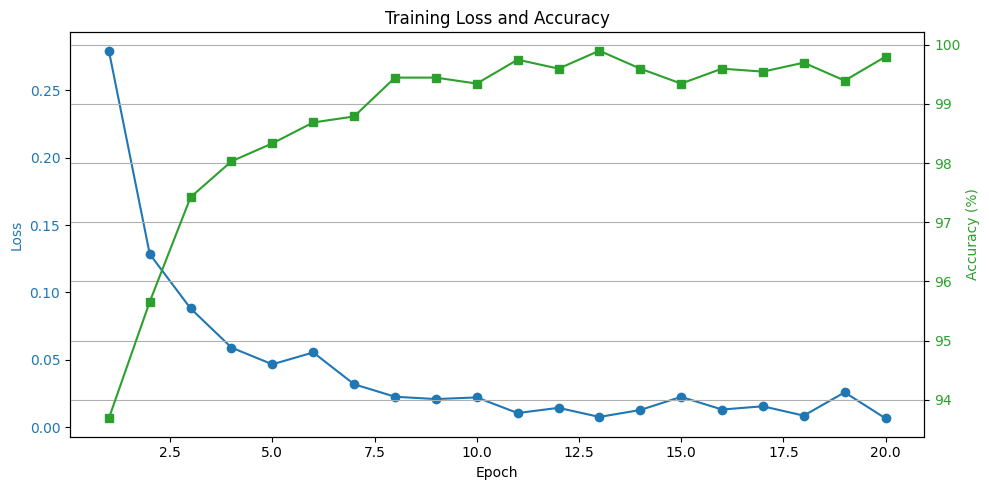

Model saved to face_recognition_model_with_unknown.pth


In [5]:


# Thiết lập thiết bị
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Đường dẫn đến thư mục chứa dữ liệu
data_dir =r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces"  # Thay bằng đường dẫn thực tế, ví dụ: "D:/faces_dataset"

# Transform cho ảnh
transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Tạo dataset và dataloader
dataset = FaceRecognitionDataset_with_unknown(root_dir=data_dir, transform=transform)
if len(dataset) == 0:
    print("No valid images found in the dataset. Please check the directory structure.")
    exit()

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
num_classes = dataset.num_classes
label_to_idx = dataset.label_to_idx
print(f"Number of classes: {num_classes}")
print(f"Labels: {label_to_idx}")

# Khởi tạo mô hình, loss, optimizer
model = FaceRecognitionCNN_wiht_unknown(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
print("Training model...")
train_model(model, dataloader, criterion, optimizer, num_epochs=20, device=device)

# Lưu mô hình
model_path = "face_recognition_model_with_unknown.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")



In [5]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import torch

def evaluate_model(model, dataloader, device='cuda'):
    """
    Đánh giá mô hình trên tập dữ liệu được cung cấp qua dataloader.
    
    Args:
        model: Mô hình PyTorch đã được huấn luyện (ví dụ: ResNet18).
        dataloader: DataLoader chứa dữ liệu để đánh giá (ảnh và nhãn).
        device: Thiết bị tính toán ('cuda' hoặc 'cpu').
    
    Returns:
        f1: F1 score (weighted average).
        precision: Precision (weighted average).
        recall: Recall (weighted average).
    """
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Tính F1 score, precision, recall
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    
    # In báo cáo chi tiết
    print("Classification Report:")
    label_to_idx = dataloader.dataset.label_to_idx
    idx_to_label = {v: k for k, v in label_to_idx.items()}
    target_names = [idx_to_label[i] for i in range(len(label_to_idx))]
    print(classification_report(all_labels, all_preds, target_names=target_names))
    
    return f1, precision, recall


# Hàm dự đoán cho toàn bộ ảnh trong một thư mục
def predict_folder(model, folder_path, transform, label_to_idx, device='cuda', threshold=0.8):
    print(f"\nPredicting images in folder: {folder_path}")
    
    # Lấy danh sách tất cả ảnh trong thư mục (hỗ trợ .jpg và .png)
    image_files = glob.glob(os.path.join(folder_path, "*.jpg")) + \
                  glob.glob(os.path.join(folder_path, "*.png"))
    
    if not image_files:
        print("No images found in the folder. Please check the directory.")
        return
    
    # Lưu kết quả dự đoán
    results = []
    total_inference_time = 0.0
    prediction_counts = {}

    for img_path in image_files:
        try:
            img = Image.open(img_path).convert('RGB')
            result, inference_time = predict(model, img, transform, label_to_idx, device, threshold)
            
            # In kết quả cho từng ảnh
            print(f"Image: {os.path.basename(img_path)}")
            print(f"Prediction: {result}")
            print(f"Inference time: {inference_time:.6f} seconds")
            
            print("-" * 50)
            
            results.append((img_path, result, inference_time))
            total_inference_time += inference_time
            
            # Đếm số lượng dự đoán cho mỗi nhãn
            label = result.split(" (")[0]  # Lấy nhãn (bỏ phần xác suất)
            prediction_counts[label] = prediction_counts.get(label, 0) + 1
            
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    
    # In tóm tắt
    print("\nSummary:")
    print(f"Total images processed: {len(results)}")
    print(f"Average inference time: {total_inference_time / len(results):.6f} seconds")
    print("\nPrediction counts:")
    for label, count in prediction_counts.items():
        print(f"{label}: {count} images")


### Detect face by model

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import numpy as np
import time
from PIL import Image
import glob

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Đường dẫn đến thư mục chứa dữ liệu
data_dir =r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces"  # Thay bằng đường dẫn thực tế, ví dụ: "D:/faces_dataset"

# Transform cho ảnh
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize về 64x64 để giảm tính toán
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Tạo dataset và dataloader
dataset = FaceRecognitionDataset_with_unknown(root_dir=data_dir, transform=transform)
if len(dataset) == 0:
    print("No valid images found in the dataset. Please check the directory structure.")
    exit()

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
num_classes = dataset.num_classes
label_to_idx = dataset.label_to_idx
print(f"Number of classes: {num_classes}")
print(f"Labels: {label_to_idx}")


model = FaceRecognitionCNN_wiht_unknown(num_classes=num_classes).to(device)
model.load_state_dict(torch.load("face_recognition_model_with_unknown.pth"))
print("\nTesting prediction time...")
# Sử dụng một ảnh thực tế để dự đoán (thay bằng đường dẫn ảnh của bạn)

test_image_path = r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces\temp_20250413_215507\face_00000_0.png"  # Thay bằng đường dẫn ảnh của bạn

print(f"Testing with image: {test_image_path}")
try:
    test_image = Image.open(test_image_path).convert('RGB')
    result, inference_time = predict(model, test_image, transform, label_to_idx, device, threshold=0.8)
    print(f"Prediction result: {result}")
    print(f"Inference time: {inference_time:.6f} seconds")
except FileNotFoundError:
    print("Test image not found. Please provide a valid image path.")


train_dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)
f1, precision, recall =evaluate_model(model, dataloader=dataloader, device=device)
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")



Using device: cuda
Number of classes: 8
Labels: {'Luan': 0, 'Trung': 1, 'Tuan': 2, 'temp_20250413_215507': 3, 'temp_20250417_160515': 4, 'thinh2': 5, 'thinh_in_school': 6, 'unknown': 7}

Testing prediction time...
Testing with image: C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces\temp_20250413_215507\face_00000_0.png
Prediction result: temp_20250413_215507 (Prob: 0.9680)
Inference time: 0.008996 seconds
Classification Report:
                      precision    recall  f1-score   support

                Luan       1.00      1.00      1.00        18
               Trung       1.00      1.00      1.00         7
                Tuan       1.00      1.00      1.00        20
temp_20250413_215507       1.00      0.89      0.94         9
temp_20250417_160515       1.00      1.00      1.00        10
              thinh2       1.00      0.90      0.95        20
     thinh_in_school       1.00      1.00      1.00        20
             unknown       1.00      1.00      1.00      1885

  

In [8]:
predict_folder(model, folder_path=r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces\unknown", transform=transform, label_to_idx=label_to_idx, device=device, threshold=0.8)
predict_folder (model, folder_path=r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces\temp_20250413_215507", transform=transform, label_to_idx=label_to_idx, device=device, threshold=0.)
predict_folder(model, folder_path=r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces\temp_20250417_160515", transform=transform, label_to_idx=label_to_idx, device=device, threshold=0.8)
predict_folder(model, folder_path=r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces\thinh", transform=transform, label_to_idx=label_to_idx, device=device, threshold=0.8)


Predicting images in folder: C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces\unknown
Image: face_00001_0.png
Prediction: unknown (Prob: 1.0000)
Inference time: 0.001996 seconds
--------------------------------------------------
Image: face_00002_0.png
Prediction: unknown (Prob: 1.0000)
Inference time: 0.001002 seconds
--------------------------------------------------
Image: face_00005_0.png
Prediction: unknown (Prob: 1.0000)
Inference time: 0.001504 seconds
--------------------------------------------------
Image: face_00007_0.png
Prediction: unknown (Prob: 1.0000)
Inference time: 0.004517 seconds
--------------------------------------------------
Image: face_00008_0.png
Prediction: unknown (Prob: 1.0000)
Inference time: 0.005308 seconds
--------------------------------------------------
Image: face_00010_0.png
Prediction: unknown (Prob: 1.0000)
Inference time: 0.002001 seconds
--------------------------------------------------
Image: face_00011_0.png
Prediction: unknown (Prob

## Testing on camera

In [6]:
import os
import cv2
import time
from datetime import datetime
import face_recognition
import numpy as np
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms


class FaceRecognitionSystem:
    def __init__(self, dataset_path="dataset", detection_method="hog", model_path="face_recognition_model_with_unknown.pth"):
        self.dataset_path = dataset_path
        self.detection_method = detection_method
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        
        self.transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])
        
        self.label_to_idx = {}
        folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
        for idx, folder in enumerate(sorted(folders)):
            self.label_to_idx[folder] = idx
        self.num_classes = len(self.label_to_idx)
        
        self.model = FaceRecognitionCNN_wiht_unknown(num_classes=self.num_classes).to(self.device)
        try:
            self.model.load_state_dict(torch.load(model_path, map_location=self.device))
            self.model.eval()
            print(f"✅ Mô hình đã được tải từ {model_path}")
        except Exception as e:
            print(f"❌ Lỗi khi tải mô hình: {e}")
            print("Vui lòng huấn luyện lại mô hình với dataset hiện tại.")

    def draw_rectangles(self, frame, top, right, bottom, left, label="Face"):
        padding = 0
        top = max(0, top - padding)
        left = max(0, left - padding)
        right = min(frame.shape[1], right + padding)
        bottom = min(frame.shape[0], bottom + padding)
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(frame, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        return frame

    def capture_images(self, num_images=10, person_name=None):
        if person_name:
            output_dir = os.path.join(self.dataset_path, person_name)
        else:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            output_dir = os.path.join(self.dataset_path, f"person_{timestamp}")
        
        os.makedirs(output_dir, exist_ok=True)
        print(f"📁 Lưu ảnh khuôn mặt vào thư mục: {output_dir}")

        video = cv2.VideoCapture(0)
        if not video.isOpened():
            print("❌ Không thể mở webcam")
            return

        print(f"🚀 Bắt đầu chụp {num_images} ảnh khuôn mặt...")
        count = 0
        while count < num_images:
            ret, frame = video.read()
            if not ret:
                print("❌ Không thể lấy khung hình từ webcam")
                break

            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            face_locations = face_recognition.face_locations(rgb_frame, model=self.detection_method)

            if face_locations:
                top, right, bottom, left = face_locations[0]
                padding = 0

                top = max(0, top - padding)
                left = max(0, left - padding)
                right = min(frame.shape[1], right + padding)
                bottom = min(frame.shape[0], bottom + padding)

                face_img = frame[top:bottom, left:right]
                face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
                face_img_pil = Image.fromarray(face_img_rgb)

                result, _ = predict(self.model, face_img_pil, self.transform, self.label_to_idx, self.device)
                frame = self.draw_rectangles(frame, top, right, bottom, left, label=result)

                filename = f"face_{count:05d}.png"
                filepath = os.path.join(output_dir, filename)
                cv2.imwrite(filepath, face_img)
                print(f"📸 Đã lưu khuôn mặt thứ {count + 1}/{num_images}: {filepath}")
                count += 1
            else:
                print(f"⚠️ Không phát hiện khuôn mặt trong khung hình thứ {count + 1}")
                cv2.imshow("Face Detection", frame)

            cv2.imshow("Face Detection", frame)
            if cv2.waitKey(1) & 0xFF == ord("q"):
                print("🛑 Người dùng đã thoát")
                break
            time.sleep(1)

        video.release()
        cv2.destroyAllWindows()
        print(f"✅ Hoàn tất! Đã lưu {count} ảnh khuôn mặt vào {output_dir}")

    def recognize_faces(self):
        video = cv2.VideoCapture(0)
        if not video.isOpened():
            print("❌ Không thể mở webcam")
            return

        print("🚀 Bắt đầu nhận diện khuôn mặt từ webcam...")
        while True:
            ret, frame = video.read()
            if not ret:
                print("❌ Không thể lấy khung hình từ webcam")
                break

            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            face_locations = face_recognition.face_locations(rgb_frame, model=self.detection_method)

            for top, right, bottom, left in face_locations:
                padding = 0
                top_padded = max(0, top - padding)
                left_padded = max(0, left - padding)
                right_padded = min(frame.shape[1], right + padding)
                bottom_padded = min(frame.shape[0], bottom + padding)

                face_img = frame[top_padded:bottom_padded, left_padded:right_padded]
                face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
                face_img_pil = Image.fromarray(face_img_rgb)

                result, _ = predict(self.model, face_img_pil, self.transform, self.label_to_idx, self.device)
                frame = self.draw_rectangles(frame, top, right, bottom, left, label=result)

            cv2.imshow("Face Recognition", frame)
            if cv2.waitKey(1) & 0xFF == ord("q"):
                print("🛑 Người dùng đã thoát")
                break

        video.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    frs = FaceRecognitionSystem(dataset_path=r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces", model_path=r"C:\Users\Divu\Desktop\DADN\detect_face\face_recognition_model_with_unknown.pth")
    mode = input("Chọn chế độ (1: Chụp ảnh, 2: Nhận diện): ").strip()
    if mode == "1":
        person_name = input("Nhập tên người (hoặc để trống để dùng timestamp): ").strip()
        frs.capture_images(num_images=10, person_name=person_name if person_name else None)
    elif mode == "2":
        frs.recognize_faces()

✅ Mô hình đã được tải từ C:\Users\Divu\Desktop\DADN\detect_face\face_recognition_model_with_unknown.pth
🚀 Bắt đầu nhận diện khuôn mặt từ webcam...
🛑 Người dùng đã thoát


# Code to regface without class Unknown

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import numpy as np
import time
from PIL import Image
import glob

# Định nghĩa dataset từ thư mục
class FaceRecognitionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_to_idx = {}
        
        # Lấy danh sách các folder (nhãn), bỏ qua folder "unknown"
        folders = [f for f in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, f)) and f.lower() != "unknown"]
        for idx, folder in enumerate(sorted(folders)):
            self.label_to_idx[folder] = idx
            # Lấy tất cả file ảnh trong folder
            image_files = glob.glob(os.path.join(root_dir, folder, "*.jpg")) + \
                         glob.glob(os.path.join(root_dir, folder, "*.png"))
            for img_path in image_files:
                self.image_paths.append(img_path)
                self.labels.append(idx)
        
        self.num_classes = len(self.label_to_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, label

# Định nghĩa mô hình CNN cho nhận diện khuôn mặt
class FaceRecognitionCNN(nn.Module):
    def __init__(self, num_classes):
        super(FaceRecognitionCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # Input: 64x64x3  Output: 64x64x16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 32x32x16 
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 16x16x32
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)   # 8x8x64
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(8 * 8 * 128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),  # Thêm dropout để giảm overfitting
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc_layers(x)
        return x

# Hàm huấn luyện mô hình
def train_model(model, dataloader, criterion, optimizer, num_epochs=5, device='cuda'):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader):.4f}, Accuracy: {accuracy:.2f}%')

# Hàm dự đoán và kiểm tra thời gian
def predict(model, image, transform, label_to_idx, device='cuda', threshold=0.8):
    model.eval()
    start_time = time.time()
    with torch.no_grad():
        image = transform(image).unsqueeze(0).to(device)
        output = model(image)
        probabilities = torch.softmax(output, dim=1)
        max_prob, predicted = torch.max(probabilities, 1)
        # Kiểm tra ngưỡng để xác định unknown
        if max_prob.item() < threshold:
            result = "Unknown"
        else:
            # Lấy tên nhãn từ chỉ số
            idx_to_label = {v: k for k, v in label_to_idx.items()}
            result = f"{idx_to_label[predicted.item()]} (Prob: {max_prob.item():.4f})"
    end_time = time.time()
    inference_time = end_time - start_time
    return result, inference_time

if __name__ == "__main__":
    # Thiết lập thiết bị
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')

    # Đường dẫn đến thư mục chứa dữ liệu
    data_dir =r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces"  # Thay bằng đường dẫn thực tế, ví dụ: "D:/faces_dataset"

    # Transform cho ảnh
    transform = transforms.Compose([
        transforms.Resize((64, 64)),  # Resize về 64x64 để giảm tính toán
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Tạo dataset và dataloader
    dataset = FaceRecognitionDataset(root_dir=data_dir, transform=transform)
    if len(dataset) == 0:
        print("No valid images found in the dataset. Please check the directory structure.")
        exit()
    
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
    num_classes = dataset.num_classes
    label_to_idx = dataset.label_to_idx
    print(f"Number of classes: {num_classes}")
    print(f"Labels: {label_to_idx}")


    # Khởi tạo mô hình, loss, optimizer
    model = FaceRecognitionCNN(num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    # Huấn luyện mô hình
    print("Training model...")
    train_model(model, dataloader, criterion, optimizer, num_epochs=20, device=device)

    # Lưu mô hình
    model_path = "face_recognition_model.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")

    # Đo thời gian dự đoán
    print("\nTesting prediction time...")
    # Sử dụng một ảnh thực tế để dự đoán (thay bằng đường dẫn ảnh của bạn)
    test_image_path = r"C:\Users\Divu\Desktop\DADN\detect_face\dataset\image.png" # Thay bằng đường dẫn ảnh thực tế
    print(f"Testing with image: {test_image_path}")
    try:
        test_image = Image.open(test_image_path).convert('RGB')
        result, inference_time = predict(model, test_image, transform, label_to_idx, device, threshold=0.8)
        print(f"Prediction result: {result}")
        print(f"Inference time: {inference_time:.6f} seconds")
    except FileNotFoundError:
        print("Test image not found. Please provide a valid image path.")

Using device: cuda
Number of classes: 6
Labels: {'Luan': 0, 'Trung': 1, 'Tuan': 2, 'temp_20250417_160515': 3, 'thinh2': 4, 'thinh_in_school': 5}
Training model...


KeyboardInterrupt: 

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import numpy as np
import time
from PIL import Image
import glob

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Đường dẫn đến thư mục chứa dữ liệu
data_dir =r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces"  # Thay bằng đường dẫn thực tế, ví dụ: "D:/faces_dataset"

# Transform cho ảnh
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize về 64x64 để giảm tính toán
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Tạo dataset và dataloader
dataset = FaceRecognitionDataset(root_dir=data_dir, transform=transform)
if len(dataset) == 0:
    print("No valid images found in the dataset. Please check the directory structure.")
    exit()

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
num_classes = dataset.num_classes
label_to_idx = dataset.label_to_idx
print(f"Number of classes: {num_classes}")
print(f"Labels: {label_to_idx}")


model = FaceRecognitionCNN(num_classes=num_classes).to(device)
model.load_state_dict(torch.load("face_recognition_model.pth"))
print("\nTesting prediction time...")
# Sử dụng một ảnh thực tế để dự đoán (thay bằng đường dẫn ảnh của bạn)

test_image_path = r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces\unknown\face_00007_0.png" # Thay bằng đường dẫn ảnh thực tế

print(f"Testing with image: {test_image_path}")
try:
    test_image = Image.open(test_image_path).convert('RGB')
    result, inference_time = predict(model, test_image, transform, label_to_idx, device, threshold=0.8)
    print(f"Prediction result: {result}")
    print(f"Inference time: {inference_time:.6f} seconds")
except FileNotFoundError:
    print("Test image not found. Please provide a valid image path.")

train_dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)
f1, precision, recall =evaluate_model(model, dataloader=dataloader, device=device)
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")



Using device: cuda
Number of classes: 4
Labels: {'Luan': 0, 'temp_20250413_215507': 1, 'temp_20250417_160515': 2, 'thinh': 3}

Testing prediction time...
Testing with image: C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces\unknown\face_00007_0.png
Prediction result: temp_20250417_160515 (Prob: 0.9992)
Inference time: 0.001999 seconds
Classification Report:
                      precision    recall  f1-score   support

                Luan       1.00      1.00      1.00        18
temp_20250413_215507       1.00      1.00      1.00         9
temp_20250417_160515       1.00      1.00      1.00        10
               thinh       1.00      1.00      1.00        19

            accuracy                           1.00        56
           macro avg       1.00      1.00      1.00        56
        weighted avg       1.00      1.00      1.00        56

F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000


# Testing

In [41]:
import os
import cv2
import time
from datetime import datetime
import face_recognition
import numpy as np
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms

class FaceRecognitionSystem:
    def __init__(self, dataset_path="dataset", detection_method="hog", model_path="face_recognition_model.pth"):
        self.dataset_path = dataset_path
        self.detection_method = detection_method
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        
        self.transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])
        
        self.label_to_idx = {}
        folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
        for idx, folder in enumerate(sorted(folders)):
            self.label_to_idx[folder] = idx
        self.num_classes = len(self.label_to_idx)
        
        self.model = FaceRecognitionCNN(num_classes=self.num_classes).to(self.device)
        try:
            self.model.load_state_dict(torch.load(model_path, map_location=self.device))
            self.model.eval()
            print(f"✅ Mô hình đã được tải từ {model_path}")
        except Exception as e:
            print(f"❌ Lỗi khi tải mô hình: {e}")
            print("Vui lòng huấn luyện lại mô hình với dataset hiện tại.")

    def draw_rectangles(self, frame, top, right, bottom, left, label="Face"):
        padding = 20
        top = max(0, top - padding)
        left = max(0, left - padding)
        right = min(frame.shape[1], right + padding)
        bottom = min(frame.shape[0], bottom + padding)
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(frame, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        return frame

    def capture_images(self, num_images=10, person_name=None):
        if person_name:
            output_dir = os.path.join(self.dataset_path, person_name)
        else:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            output_dir = os.path.join(self.dataset_path, f"person_{timestamp}")
        
        os.makedirs(output_dir, exist_ok=True)
        print(f"📁 Lưu ảnh khuôn mặt vào thư mục: {output_dir}")

        video = cv2.VideoCapture(0)
        if not video.isOpened():
            print("❌ Không thể mở webcam")
            return

        print(f"🚀 Bắt đầu chụp {num_images} ảnh khuôn mặt...")
        count = 0
        while count < num_images:
            ret, frame = video.read()
            if not ret:
                print("❌ Không thể lấy khung hình từ webcam")
                break

            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            face_locations = face_recognition.face_locations(rgb_frame, model=self.detection_method)

            if face_locations:
                top, right, bottom, left = face_locations[0]
                padding = 0
                top = max(0, top - padding)
                left = max(0, left - padding)
                right = min(frame.shape[1], right + padding)
                bottom = min(frame.shape[0], bottom + padding)

                face_img = frame[top:bottom, left:right]
                face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
                face_img_pil = Image.fromarray(face_img_rgb)

                result, _ = predict(self.model, face_img_pil, self.transform, self.label_to_idx, self.device)
                frame = self.draw_rectangles(frame, top, right, bottom, left, label=result)

                filename = f"face_{count:05d}.png"
                filepath = os.path.join(output_dir, filename)
                cv2.imwrite(filepath, face_img)
                print(f"📸 Đã lưu khuôn mặt thứ {count + 1}/{num_images}: {filepath}")
                count += 1
            else:
                print(f"⚠️ Không phát hiện khuôn mặt trong khung hình thứ {count + 1}")
                cv2.imshow("Face Detection", frame)

            cv2.imshow("Face Detection", frame)
            if cv2.waitKey(1) & 0xFF == ord("q"):
                print("🛑 Người dùng đã thoát")
                break
            time.sleep(1)

        video.release()
        cv2.destroyAllWindows()
        print(f"✅ Hoàn tất! Đã lưu {count} ảnh khuôn mặt vào {output_dir}")

    def recognize_faces(self):
        video = cv2.VideoCapture(0)
        if not video.isOpened():
            print("❌ Không thể mở webcam")
            return

        print("🚀 Bắt đầu nhận diện khuôn mặt từ webcam...")
        while True:
            ret, frame = video.read()
            if not ret:
                print("❌ Không thể lấy khung hình từ webcam")
                break

            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            face_locations = face_recognition.face_locations(rgb_frame, model=self.detection_method)

            for top, right, bottom, left in face_locations:
                padding = 0
                top_padded = max(0, top - padding)
                left_padded = max(0, left - padding)
                right_padded = min(frame.shape[1], right + padding)
                bottom_padded = min(frame.shape[0], bottom + padding)

                face_img = frame[top_padded:bottom_padded, left_padded:right_padded]
                face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
                face_img_pil = Image.fromarray(face_img_rgb)

                result, _ = predict(self.model, face_img_pil, self.transform, self.label_to_idx, self.device)
                frame = self.draw_rectangles(frame, top, right, bottom, left, label=result)

            cv2.imshow("Face Recognition", frame)
            if cv2.waitKey(1) & 0xFF == ord("q"):
                print("🛑 Người dùng đã thoát")
                break

        video.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    frs = FaceRecognitionSystem(dataset_path=r"C:\Users\Divu\Desktop\DADN\detect_face\extracted_faces", model_path=r"C:\Users\Divu\Desktop\DADN\detect_face\face_recognition_model.pth")
    mode = input("Chọn chế độ (1: Chụp ảnh, 2: Nhận diện): ").strip()
    if mode == "1":
        person_name = input("Nhập tên người (hoặc để trống để dùng timestamp): ").strip()
        frs.capture_images(num_images=10, person_name=person_name if person_name else None)
    elif mode == "2":
        frs.recognize_faces()

❌ Lỗi khi tải mô hình: Error(s) in loading state_dict for FaceRecognitionCNN:
	size mismatch for fc_layers.3.weight: copying a param with shape torch.Size([4, 128]) from checkpoint, the shape in current model is torch.Size([6, 128]).
	size mismatch for fc_layers.3.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([6]).
Vui lòng huấn luyện lại mô hình với dataset hiện tại.
🚀 Bắt đầu nhận diện khuôn mặt từ webcam...
🛑 Người dùng đã thoát
